In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("car_price.csv")

# One-hot encode categorical features
df = pd.get_dummies(df, drop_first=True)

# Define features and target
# Check the DataFrame columns to find the correct target variable name
# print(df.columns) # Uncomment to see the column names
X = df.drop("Price", axis=1)  # Assuming 'Price' is the correct column name based on the error
y = df["Price"] # Assuming 'Price' is the correct column name

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load dataset (replace with your actual file path)
df = pd.read_csv("car_price.csv")

# Preprocessing
df = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for gradient descent
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = {}

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

results['Linear'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MSE': mean_squared_error(y_test, y_pred_lr),
    'R2': r2_score(y_test, y_pred_lr),
    'Coefficients': lr.coef_,
    'Intercept': lr.intercept_
}

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train) # Corrected target variable
y_pred_ridge = ridge.predict(X_test)

results['Ridge'] = {
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'MSE': mean_squared_error(y_test, y_pred_ridge),
    'R2': r2_score(y_test, y_pred_ridge),
    'Coefficients': ridge.coef_,
    'Intercept': ridge.intercept_
}

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train) # Corrected target variable
y_pred_lasso = lasso.predict(X_test)

results['Lasso'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lasso),
    'MSE': mean_squared_error(y_test, y_pred_lasso),
    'R2': r2_score(y_test, y_pred_lasso),
    'Coefficients': lasso.coef_,
    'Intercept': lasso.intercept_
}

# ElasticNet Regression
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train) # Corrected target variable
y_pred_elastic = elastic.predict(X_test)

results['ElasticNet'] = {
    'MAE': mean_absolute_error(y_test, y_pred_elastic),
    'MSE': mean_squared_error(y_test, y_pred_elastic),
    'R2': r2_score(y_test, y_pred_elastic),
    'Coefficients': elastic.coef_,
    'Intercept': elastic.intercept_
}

# ----------------------------
# Gradient Descent Regression
# ----------------------------

# Add bias term (intercept) manually
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
y_gd = y_train.values.reshape(-1, 1)

# Initialize parameters
theta = np.zeros((X_b.shape[1], 1))

# Hyperparameters
learning_rate = 0.01
n_iterations = 1000
m = X_b.shape[0]

# Gradient Descent Loop
for _ in range(n_iterations):
    gradients = (2/m) * X_b.T.dot(X_b.dot(theta) - y_gd)
    theta -= learning_rate * gradients

# Predict using gradient descent
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_pred_gd = X_test_b.dot(theta).flatten()

results['GradientDescent'] = {
    'MAE': mean_absolute_error(y_test, y_pred_gd),
    'MSE': mean_squared_error(y_test, y_pred_gd),
    'R2': r2_score(y_test, y_pred_gd),
    'Coefficients': theta[1:].flatten(),
    'Intercept': theta[0][0]
}

# ----------------------------
# Display Results
# ----------------------------
df_results = pd.DataFrame(results).T[['MAE', 'MSE', 'R2']]
print("Performance Metrics:\n")
print(df_results)

# ----------------------------
# Optional: Print Coefficients
# ----------------------------
# for model, values in results.items():
#     print(f"\n{model} Coefficients:\n{values['Coefficients']}")

Performance Metrics:

                         MAE               MSE        R2
Linear           7280.667793  176760096.861086 -1.239056
Ridge            2003.386269    8918695.282854  0.887025
Lasso            3219.066263   30618700.020951  0.612147
ElasticNet       2115.485274    9626407.566381   0.87806
GradientDescent  2558.363151   16863429.016455  0.786388


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.075e+07, tolerance: 9.781e+05
  model = cd_fast.enet_coordinate_descent(


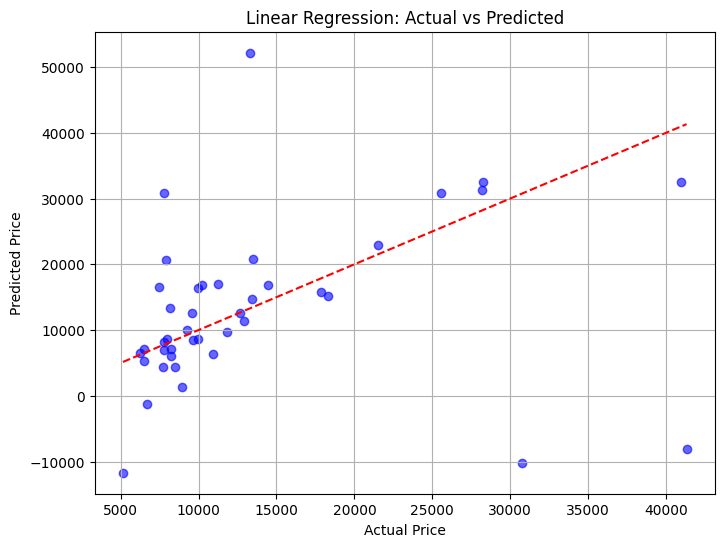

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


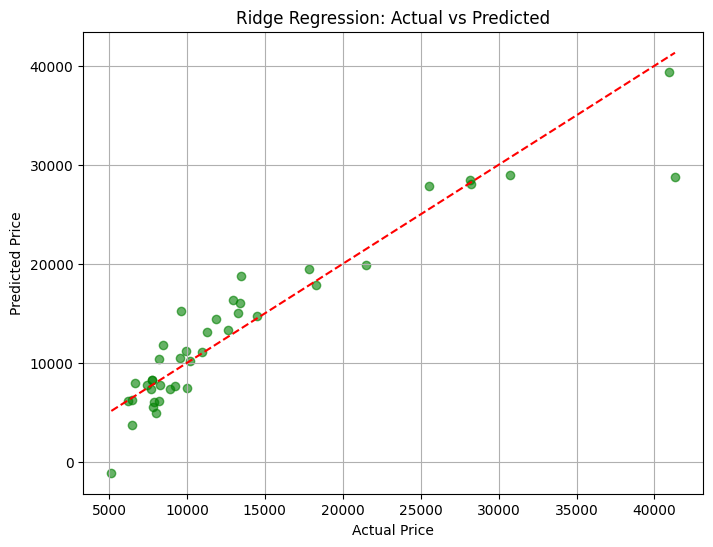

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Ridge Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


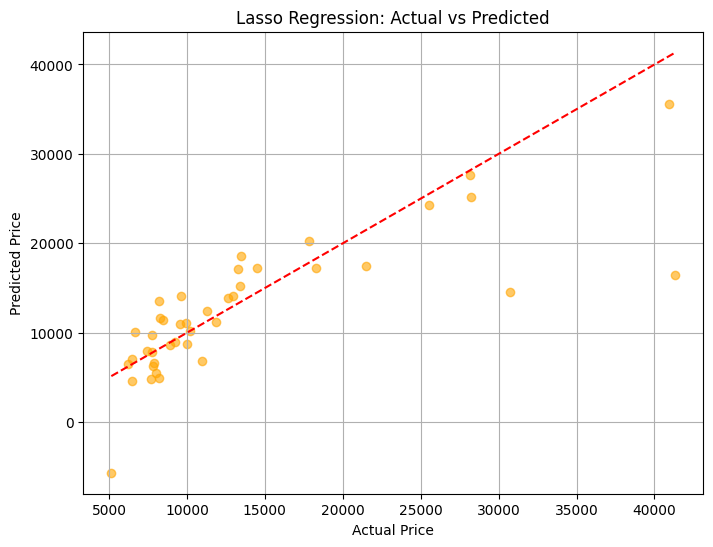

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lasso, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Lasso Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()


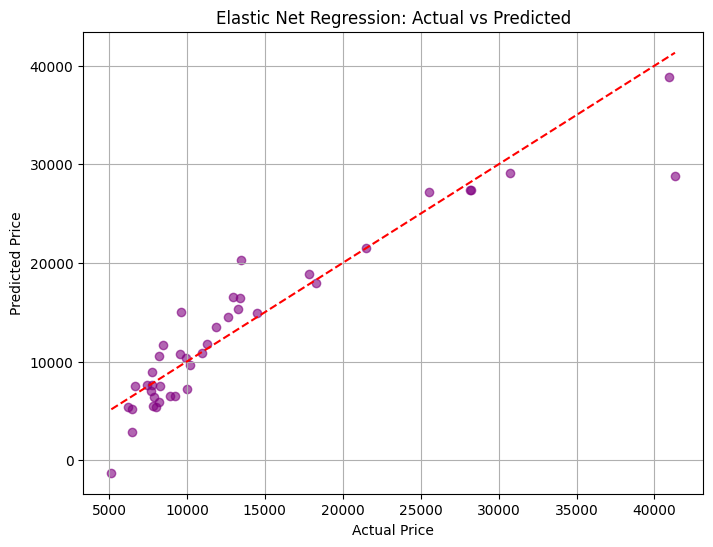

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_elastic, color='purple', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Elastic Net Regression: Actual vs Predicted')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

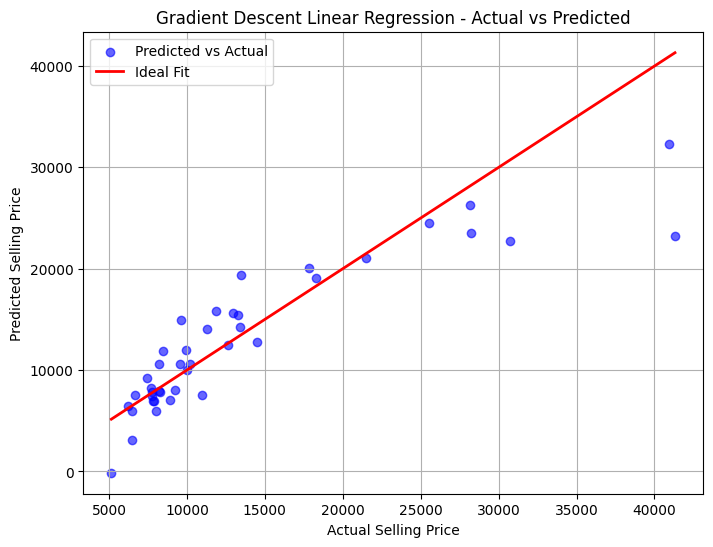

In [28]:
# Regression graph for Gradient Descent
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gd, color='blue', alpha=0.6, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Ideal Fit")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Gradient Descent Linear Regression - Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()


In [29]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate error percentages for each model
mape_linear = mean_absolute_percentage_error(y_test, y_pred_lr)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
mape_elastic = mean_absolute_percentage_error(y_test, y_pred_elastic)
mape_gd = mean_absolute_percentage_error(y_test, y_pred_gd)  # <-- Added

# Print all results
print(f"Linear Regression MAPE: {mape_linear:.2f}%")
print(f"Ridge Regression MAPE: {mape_ridge:.2f}%")
print(f"Lasso Regression MAPE: {mape_lasso:.2f}%")
print(f"ElasticNet Regression MAPE: {mape_elastic:.2f}%")
print(f"Gradient Descent Regression MAPE: {mape_gd:.2f}%")  # <-- Added




Linear Regression MAPE: 58.69%
Ridge Regression MAPE: 18.39%
Lasso Regression MAPE: 25.98%
ElasticNet Regression MAPE: 19.91%
Gradient Descent Regression MAPE: 19.39%
